## Data Analysis Question: Are there performance improvements at the call center by agents?

Data Source: data.world
    
Data Analyst: Alex Idachaba

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import date

In [2]:
call_center = pd.read_csv('call_center.csv')
call_center.head(3)

,YR_MO,CALL_DATE,AGENT_ID,AGENT_NAME,TEAM_LEAD_ID,TEAM_LEAD_NAME,CALL_CENTER,CALLS,HANDLE_TIME,CALL_REGEN,CALLS_WITH_OFFER,CALLS_WITH_ACCEPT,CALLS_OFFER_APPLIED,TRANSFERS,AHT_MULTI,CALL_REGEN_MULTI,TRANSFERS_MULTI,APPLIED_PER_CALL_MULTI,BREAKAGE_MULTI
0,201706.0,01/06/2017,201700121.0,"Anderson, Albert",201700011.0,"Winnerson, Aceona",Williamburg,34.0,25710.0,5.0,31.0,22.0,19.0,2.0,26520.0,5.678,2.788,17.170,6.834
1,201706.0,01/06/2017,201700122.0,"Binning, Bart",201700011.0,"Winnerson, Aceona",Williamburg,35.0,25039.0,4.0,34.0,29.0,26.0,2.0,27300.0,5.845,2.870,17.675,7.035
2,201706.0,01/06/2017,201700123.0,"Centerville, Cece",201700011.0,"Winnerson, Aceona",Williamburg,38.0,24436.0,6.0,36.0,32.0,28.0,3.0,29640.0,6.346,3.116,19.190,7.638


In [3]:
# Check data info
call_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 19 columns):
YR_MO                     1525 non-null float64
CALL_DATE                 1525 non-null object
AGENT_ID                  1525 non-null float64
AGENT_NAME                1525 non-null object
TEAM_LEAD_ID              1525 non-null float64
TEAM_LEAD_NAME            1525 non-null object
CALL_CENTER               1526 non-null object
CALLS                     1526 non-null float64
HANDLE_TIME               1526 non-null float64
CALL_REGEN                1525 non-null float64
CALLS_WITH_OFFER          1525 non-null float64
CALLS_WITH_ACCEPT         1525 non-null float64
CALLS_OFFER_APPLIED       1525 non-null float64
TRANSFERS                 1525 non-null float64
AHT_MULTI                 1525 non-null float64
CALL_REGEN_MULTI          1525 non-null float64
TRANSFERS_MULTI           1525 non-null float64
APPLIED_PER_CALL_MULTI    1525 non-null float64
BREAKAGE_MULTI            1525 no

In [4]:
# Drop duplicate rows
call_center = call_center.drop_duplicates()

In [5]:
# Check for null values
call_center.dropna(axis=0,how='all',inplace=True)

In [6]:
# convert date coulmn to datetime
call_center['CALL_DATE'] = pd.to_datetime(call_center['CALL_DATE'], yearfirst=True, format='%d/%m/%Y')

In [7]:
# Add a new column named 'Avg_Handle_Time'
call_center['AVG_HANDLE_TIME'] = (call_center['HANDLE_TIME']/call_center['CALLS'])
call_center.head(3)

,YR_MO,CALL_DATE,AGENT_ID,AGENT_NAME,TEAM_LEAD_ID,TEAM_LEAD_NAME,CALL_CENTER,CALLS,HANDLE_TIME,CALL_REGEN,CALLS_WITH_OFFER,CALLS_WITH_ACCEPT,CALLS_OFFER_APPLIED,TRANSFERS,AHT_MULTI,CALL_REGEN_MULTI,TRANSFERS_MULTI,APPLIED_PER_CALL_MULTI,BREAKAGE_MULTI,AVG_HANDLE_TIME
0,201706.0,2017-06-01,201700121.0,"Anderson, Albert",201700011.0,"Winnerson, Aceona",Williamburg,34.0,25710.0,5.0,31.0,22.0,19.0,2.0,26520.0,5.678,2.788,17.170,6.834,756.176471
1,201706.0,2017-06-01,201700122.0,"Binning, Bart",201700011.0,"Winnerson, Aceona",Williamburg,35.0,25039.0,4.0,34.0,29.0,26.0,2.0,27300.0,5.845,2.870,17.675,7.035,715.400000
2,201706.0,2017-06-01,201700123.0,"Centerville, Cece",201700011.0,"Winnerson, Aceona",Williamburg,38.0,24436.0,6.0,36.0,32.0,28.0,3.0,29640.0,6.346,3.116,19.190,7.638,643.052632


In [8]:
# Lets extract the data for the month of June
call_center.sort_values('CALL_DATE', ascending=True, inplace=True)

In [9]:
date_from = pd.Timestamp(date(2017,6,1))
date_to = pd.Timestamp(date(2017,6,30))

call_center = call_center[(call_center['CALL_DATE'] >= date_from) & (call_center['CALL_DATE'] <= date_to)]

In [10]:
call_center.head(3)

,YR_MO,CALL_DATE,AGENT_ID,AGENT_NAME,TEAM_LEAD_ID,TEAM_LEAD_NAME,CALL_CENTER,CALLS,HANDLE_TIME,CALL_REGEN,CALLS_WITH_OFFER,CALLS_WITH_ACCEPT,CALLS_OFFER_APPLIED,TRANSFERS,AHT_MULTI,CALL_REGEN_MULTI,TRANSFERS_MULTI,APPLIED_PER_CALL_MULTI,BREAKAGE_MULTI,AVG_HANDLE_TIME
0,201706.0,2017-06-01,201700121.0,"Anderson, Albert",201700011.0,"Winnerson, Aceona",Williamburg,34.0,25710.0,5.0,31.0,22.0,19.0,2.0,26520.0,5.678,2.788,17.17,6.834,756.176471
15,201706.0,2017-06-01,201700145.0,"Abacus, Aaron",201700013.0,"Oferten, Quinton",Williamburg,32.0,24876.0,9.0,29.0,18.0,7.0,4.0,24960.0,5.344,2.624,16.16,6.432,777.375000
14,201706.0,2017-06-01,201700144.0,"Zwilowski, Zane",201700013.0,"Oferten, Quinton",Williamburg,32.0,24700.0,9.0,28.0,22.0,9.0,4.0,24960.0,5.344,2.624,16.16,6.432,771.875000


In [11]:
# Lets select 14 days by dates range

date_st = pd.Timestamp(date(2017,6,1))
date_en = pd.Timestamp(date(2017,6,14))

two_weeks = call_center[(call_center['CALL_DATE'] >= date_st) & (call_center['CALL_DATE'] <= date_en)]

# Lets groupby 14 days
period = two_weeks['CALL_DATE'].dt.to_period('D')
week = two_weeks.groupby(period)
week['AVG_HANDLE_TIME'].mean()

CALL_DATE
2017-06-01    752.048929
2017-06-02    732.319085
2017-06-03    784.244498
2017-06-04    679.288104
2017-06-05    779.024896
2017-06-06    760.924435
2017-06-07    785.473540
2017-06-08    773.199967
2017-06-09    736.331764
2017-06-10    788.476019
2017-06-11    719.796304
2017-06-12    765.451977
2017-06-13    755.068571
2017-06-14    776.621182
Freq: D, Name: AVG_HANDLE_TIME, dtype: float64

In [12]:
x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
y = week['AVG_HANDLE_TIME'].mean()

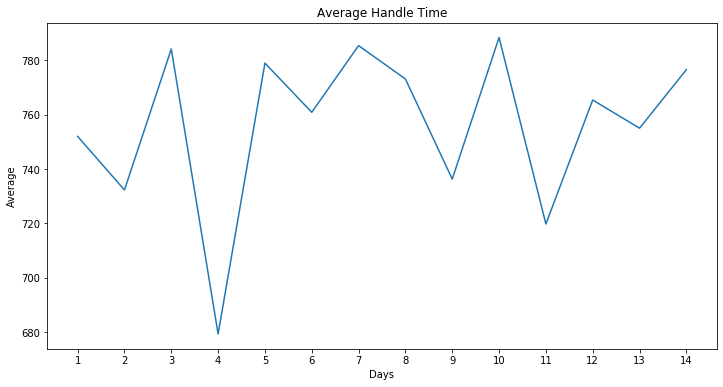

In [13]:
# plot two weeks average
plt.figure(figsize=(12,6))
plt.title('Average Handle Time')
plt.plot(x, y)
plt.xlabel('Days')
plt.ylabel('Average')
plt.show()

In [14]:
y = week['CALLS'].sum()

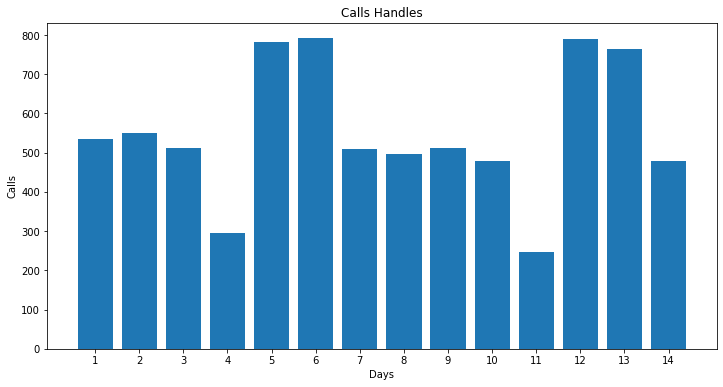

In [15]:
# Lets plot calls handled
plt.figure(figsize=(12,6))
plt.title('Calls Handles')
plt.bar(x, y)
plt.xlabel('Days')
plt.ylabel('Calls')
plt.show()

In [16]:
y = y = week['TRANSFERS'].sum()

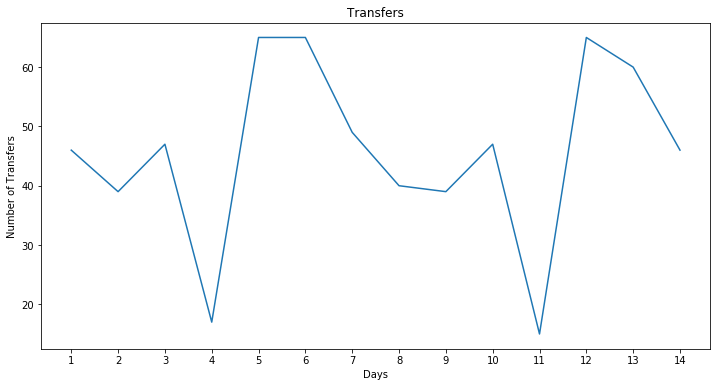

In [17]:
# Lets plot Transfers
plt.figure(figsize=(12,6))
plt.title('Transfers')
plt.plot(x, y)
plt.xlabel('Days')
plt.ylabel('Number of Transfers')
plt.show()

In [18]:
# Lets plot the top 5 agents within the two weeks
agent = two_weeks.groupby('AGENT_NAME')
agent['CALLS'].sum().nlargest(5)

AGENT_NAME
Davenport, Davina    361.0
Gee, Garry           361.0
Anderson, Albert     360.0
Binning, Bart        354.0
Edgerton, Ethan      353.0
Name: CALLS, dtype: float64

In [19]:
# Export modified data
call_center.to_csv('call_center_modified.csv',encoding='utf-8', index=False)